<a href="https://colab.research.google.com/github/mrOstrovsky/Kaggle_projects-/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from wordcloud import WordCloud

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)


%matplotlib inline

RANDOM_STATE = 47

# Uploaded data


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")

In [4]:
df_test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")

In [5]:
df_gender = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")

Наименование и определние векторов

*   **Pclass** - класс в котором плыл пассжаир (passanger class)
*   **SibSp** - количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту (sibling/spouse)
*   **Parch** - кол-во детей/родителей пассажира на борту (parent/children)
*   **Cabin** - номер каюты
*   **Ticket** - номер билета
*   **Age** - возраст
*   **Fare** — плата за проезд
*   **Embarked**— порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)
*   **Name** — имя
*   **Sex** — пол





## Train

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Test


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
df_test.shape

(418, 11)

In [12]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Analysis/Pre-processing

## Train/Test

In [15]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Pass processing



In [19]:
train_test = [df_train, df_test] # combining train and test dataset

#### Age

In [20]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
for dataset in train_test:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

#### Cabin

Not used

#### Embarked

In [22]:
df_train['Embarked'].mode()[0]

'S'

In [23]:
df_test['Embarked'].mode()[0]

'S'

In [24]:
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [25]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [26]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Fare

In [27]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
df_test['Fare'] = df_train['Fare'].fillna(df_test['Fare'].median())

### Analysis/Processing

#### Survival/Pclass

In [29]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
df_train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [31]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [32]:
fig = px.histogram(df_train,
                   x = 'Pclass',
                   color = 'Survived',
                   barmode = 'stack',
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survival by class',
    xaxis_title_text = 'Pclass',
    yaxis_title_text = 'Count',
    bargap = 0.2,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3],
        ticktext = ['Class 1', 'Class 2', 'Class 3']
    )
)

fig.show()

#### Survival/Sex

In [33]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [34]:
df_train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [35]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
fig = px.histogram(df_train,
                   x = 'Sex',
                   color = 'Survived',
                   barmode = 'stack',
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survival by sex',
    xaxis_title_text = 'Sex',
    yaxis_title_text = 'Count',
    bargap = 0.2,
    xaxis = dict(
        tickmode = 'array',
        ticktext = ['male', 'female']
    )
)

fig.show()

#### Survival/Class/Sex

In [37]:
pd.crosstab(df_train['Pclass'], df_train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [38]:
df_train.groupby('Pclass').Sex.value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [39]:
fig = px.histogram(df_train,
                   x = 'Pclass',
                   color = 'Survived',
                   facet_col = 'Sex',
                   barmode = 'stack',
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survival by class and sex',
    xaxis_title_text = 'Pclass',
    yaxis_title_text = 'Count',
    bargap = 0.2,

    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3],
        ticktext = ['Class 1', 'Class 2', 'Class 3']
    )
)

fig.show()

#### Survival/Pclass/Embarkation

In [40]:
df_train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
pd.crosstab(df_train['Embarked'], df_train['Survived'])


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219


In [42]:
fig = px.histogram(df_train,
                   x = 'Embarked',
                   color = 'Survived',
                   facet_col = 'Embarked',
                   barmode = 'group',
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survival by port of embarkation',
    xaxis_title_text = 'Embarked',
    yaxis_title_text = 'Count',
    bargap = 0.2,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3],
    )
)

fig.show()

In [43]:

fig = px.histogram(df_train,
                   x = 'Pclass',
                   color = 'Embarked',
                   barmode = 'group',
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Class by port of embarkation',
    xaxis_title_text = 'Pclass',
    yaxis_title_text = 'Count',
    bargap = 0.2,
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3],
        ticktext = ['Class 1', 'Class 2', 'Class 3']
    )
)

fig.show()

#### Survival/Age

In [44]:

fig = px.histogram(df_train,
                   x = 'Age',
                   color = 'Survived',
                   barmode = 'group',
                   nbins = 10,
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survived by age',
    xaxis_title_text = 'Age',
    yaxis_title_text = 'Count',
    bargap = 0.1,
)
fig.show()

#### Survival/Parch

In [45]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [46]:
pd.crosstab(df_train['Parch'], df_train['Survived'])


Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [47]:
df_train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [48]:

fig = px.histogram(df_train,
                   x = 'Parch',
                   color = 'Survived',
                   barmode = 'group',
                   nbins = 10,
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survived by parch',
    xaxis_title_text = 'Parch',
    yaxis_title_text = 'Count',
    bargap = 0.1,
)
fig.show()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

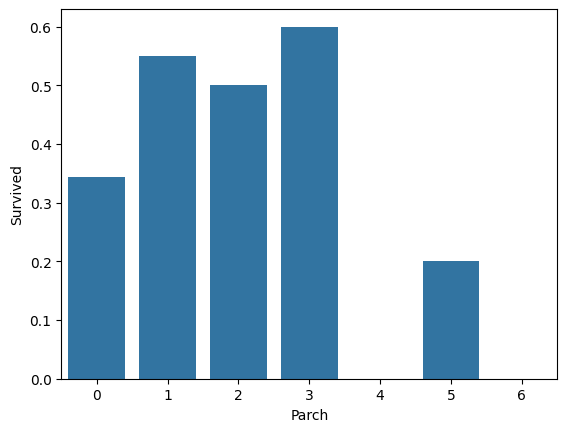

In [49]:
display(df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean())

sns.barplot(x='Parch', y='Survived', errorbar=None, data=df_train)

#### Survival/SibSp

In [50]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
pd.crosstab(df_train['SibSp'], df_train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

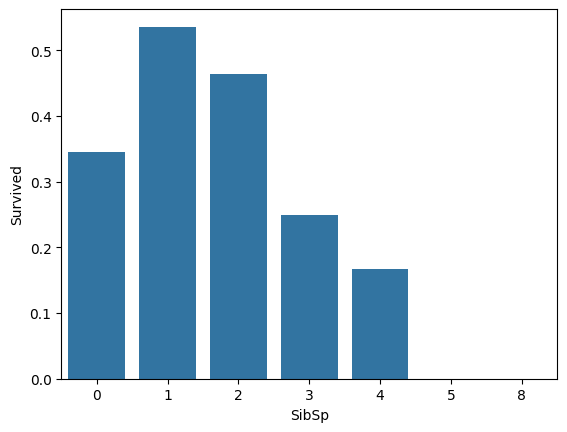

In [52]:
display(df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean())

sns.barplot(x='SibSp', y='Survived', errorbar=None, data=df_train)

## Analysis/Creation of new features/Encoding

#### Sibs+Parch=Family/IsAlone (Mapping)

In [53]:
for dataset in train_test:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


**Mapping**

In [54]:
for dataset in train_test:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print(df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [55]:
fig = px.histogram(df_train,
                   x = 'IsAlone',
                   color = 'Survived',
                   barmode = 'group',
                   nbins = 2,
                   text_auto = True)

fig.update_layout(
    font = {
        "family":"Geometria",
        "size":16
    },
    title_text = 'Survived by family',
    xaxis_title_text = 'IsAlone',
    yaxis_title_text = 'Count',
    bargap = 0.1,
)
fig.show()

#### Name/Title (OrdinalEncoder)

**The encoding is done in pipeline**

In [56]:
for dataset in train_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

In [57]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,Mr


In [58]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [59]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [60]:
for dataset in train_test:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


print('Sum')
display(df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).sum())
print('Mean')
display(df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

Sum


,Title,Survived
0,Master,23
1,Miss,130
2,Mr,81
3,Mrs,100
4,Other,8


Mean


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


#### Age (encoding mapping)

**Mapping**

In [61]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] =  dataset['Age'].astype(int)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,1,1,Mr


#### Sex (OneHotEncoder)

**The encoding is done in pipeline**

#### Fare (Mapping)  

In [62]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [63]:
df_train['Fare'].value_counts(bins=4)

(-0.513, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64

In [64]:
df_train['Fare_group'] = pd.qcut(df_train['Fare'], 4)
print(pd.crosstab(df_train['Fare_group'], df_train['Survived']))
print()
print(df_train[['Fare_group', 'Survived']].groupby(['Fare_group'], as_index=False).mean())

Survived           0    1
Fare_group               
(-0.001, 7.91]   179   44
(7.91, 14.454]   156   68
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129

        Fare_group  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [65]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,2,0,Mrs,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,2,0,Mrs,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,1,1,Mr,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,13.0000,NaN,S,1,1,Other,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S,1,1,Miss,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,1,2,W./C. 6607,23.4500,NaN,S,4,0,Miss,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,30.0000,C148,C,1,1,Mr,"(14.454, 31.0]"


**Mapping**

In [66]:
for dataset in train_test:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] =  dataset['Fare'].astype(int)

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,2,0,Mr,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C85,C,2,0,Mrs,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,1,1,Miss,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C123,S,2,0,Mrs,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,NaN,S,1,1,Mr,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,1,NaN,S,1,1,Other,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,2,B42,S,1,1,Miss,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,1,2,W./C. 6607,2,NaN,S,4,0,Miss,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,2,C148,C,1,1,Mr,"(14.454, 31.0]"


#### Embarked (OneHotEncoder)

**The encoding is done in pipeline**

# Data preparation for model training

In [67]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,2,0,Mr,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C85,C,2,0,Mrs,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,1,1,Miss,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C123,S,2,0,Mrs,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,NaN,S,1,1,Mr,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,1,NaN,S,1,1,Other,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,2,B42,S,1,1,Miss,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,1,2,W./C. 6607,2,NaN,S,4,0,Miss,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,2,C148,C,1,1,Mr,"(14.454, 31.0]"


In [68]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,892,3,"Kelly, Mr. James",male,2,0,0,330911,0,NaN,Q,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,3,NaN,S,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,1,NaN,Q,1,1,Mr
3,895,3,"Wirz, Mr. Albert",male,1,0,0,315154,3,NaN,S,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,1,NaN,S,3,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,1,0,0,A.5. 3236,0,NaN,S,1,1,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,2,0,0,PC 17758,1,C105,C,1,1,Other
415,1307,3,"Saether, Mr. Simon Sivertsen",male,2,0,0,SOTON/O.Q. 3101262,1,NaN,S,1,1,Mr
416,1308,3,"Ware, Mr. Frederick",male,1,0,0,359309,3,NaN,S,1,1,Mr


In [69]:
ohe_features = ['Sex','Embarked']

In [70]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
num_features = ['Pclass','Age','Fare','IsAlone']

df_train = df_train.drop(features_drop, axis=1)
df_train = df_train.drop(['PassengerId', 'Fare_group'], axis=1)

df_test = df_test.drop(features_drop, axis=1)


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   Fare      891 non-null    int64 
 5   Embarked  891 non-null    object
 6   IsAlone   891 non-null    int64 
 7   Title     891 non-null    object
dtypes: int64(5), object(3)
memory usage: 55.8+ KB


In [72]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,892,3,male,2,0,Q,1,Mr
1,893,3,female,2,3,S,0,Mrs
2,894,2,male,3,1,Q,1,Mr
3,895,3,male,1,3,S,1,Mr
4,896,3,female,1,1,S,0,Mrs
...,...,...,...,...,...,...,...,...
413,1305,3,male,1,0,S,1,Mr
414,1306,1,female,2,1,C,1,Other
415,1307,3,male,2,1,S,1,Mr
416,1308,3,male,1,3,S,1,Mr


### Correlation matrix

<ipython-input-73-40039f85aa63>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



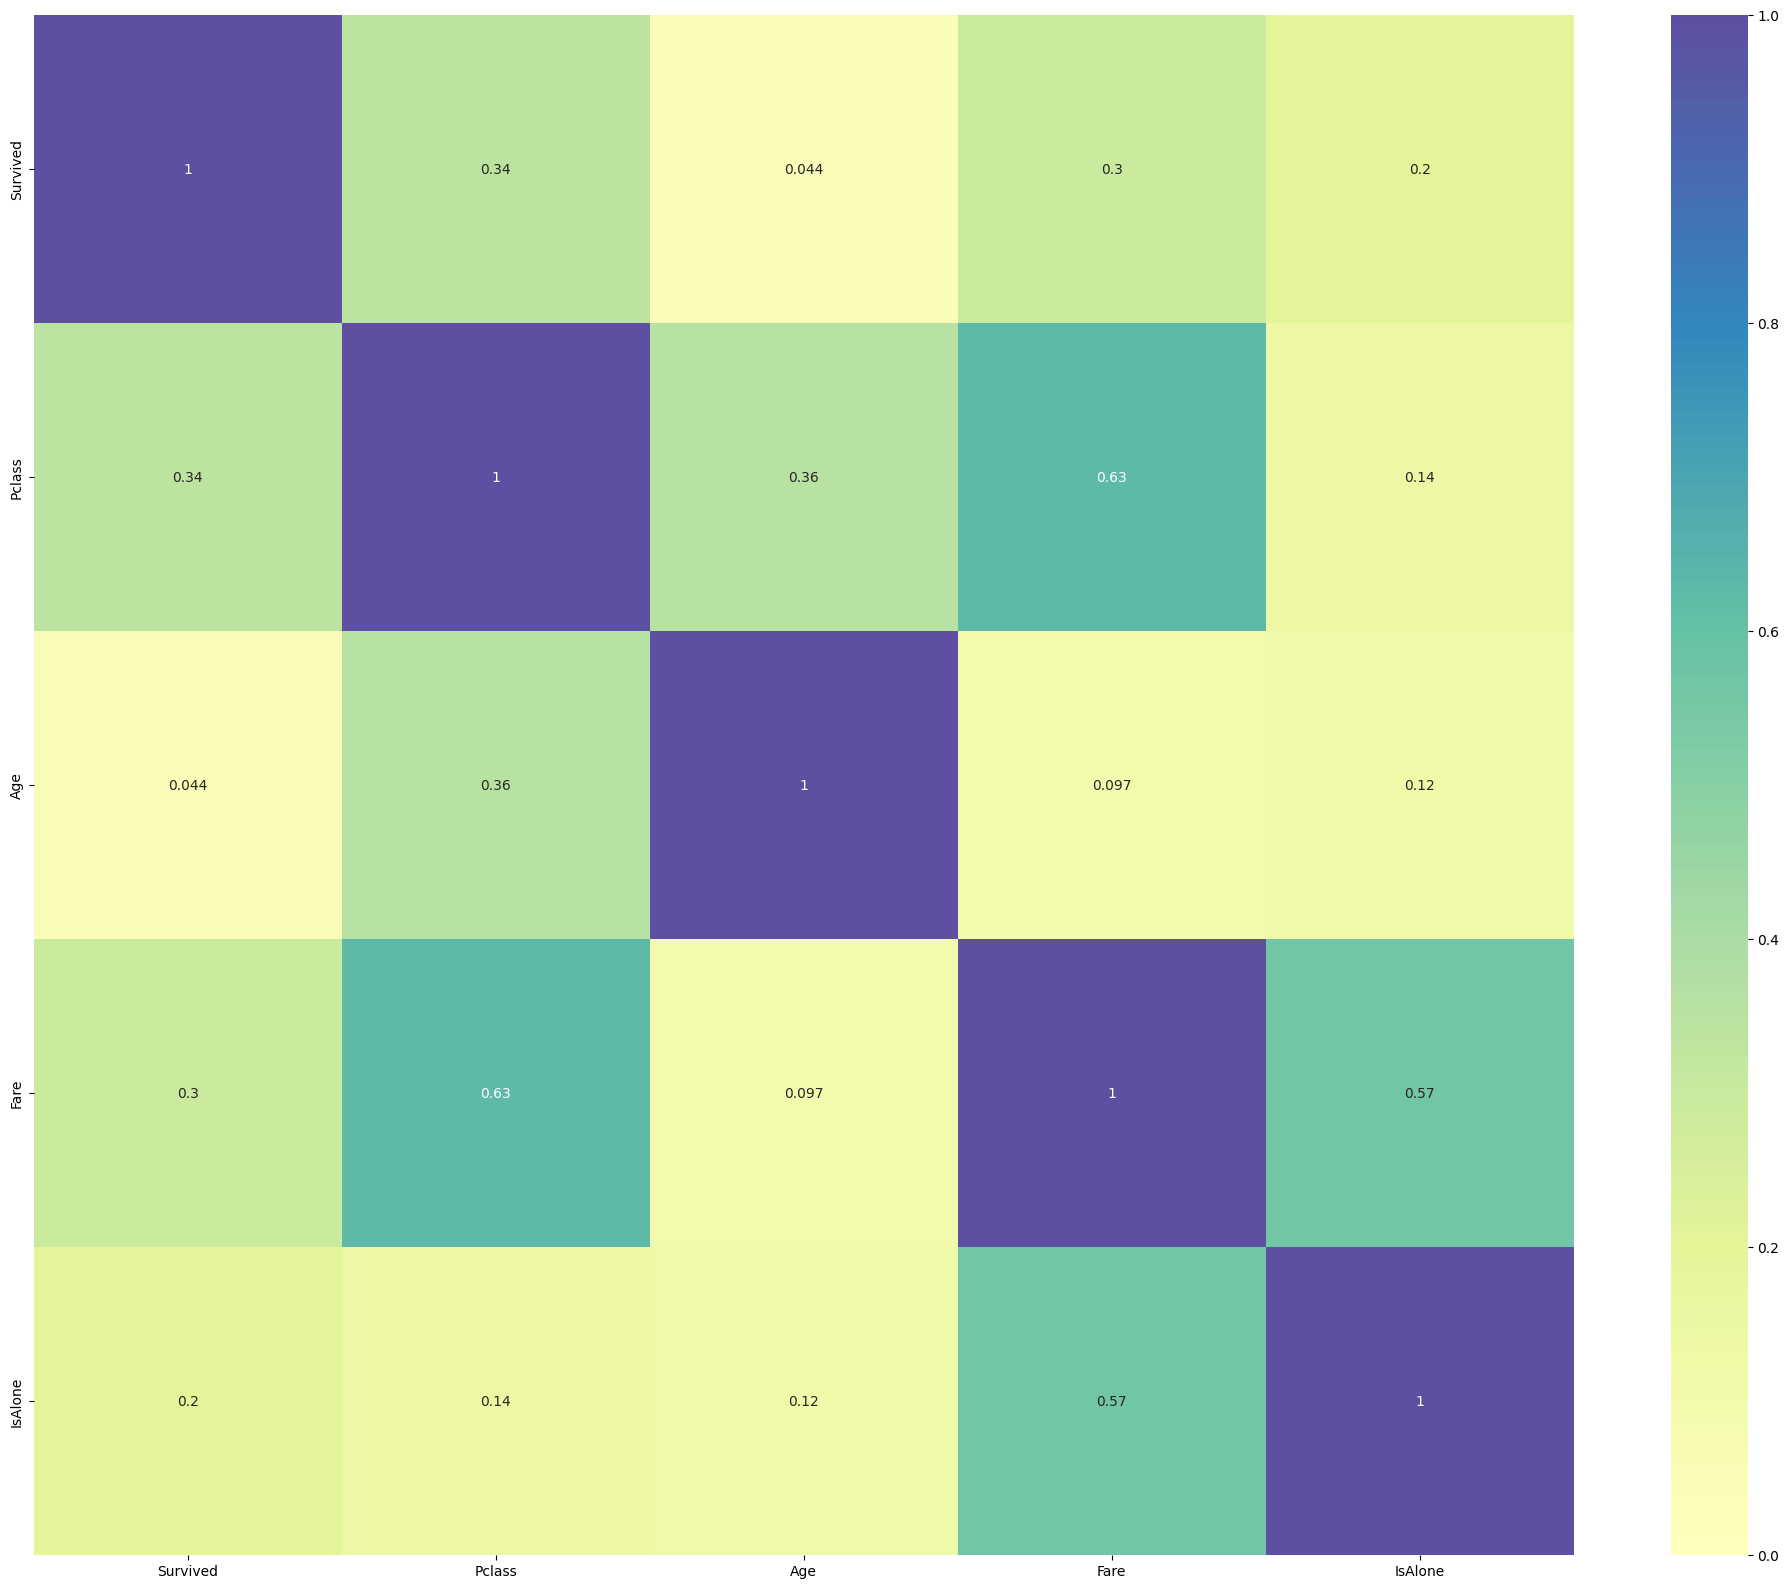

In [73]:
corr = abs(df_train.corr())

f, ax = plt.subplots(figsize=(25, 20))

font = {
        "family":"Geometria",
        "size":16
    }

cmap = 'Spectral'

ax = sns.heatmap(
    corr,
    cmap=cmap,
    annot=True,
    vmax=1,
    vmin=0,
    center=0,
    square=True,
    linewidths=0,
    xticklabels=True,
    yticklabels=True
)

In [74]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_test = df_test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### Model training

In [75]:
model_scores = {}

#### RandomForestClassifier

In [76]:
col_transformer_rf= make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['Title']
    ),
     (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

model_rf = RandomForestClassifier(random_state=RANDOM_STATE,n_estimators=50)

pipline_rf = make_pipeline(col_transformer_rf, model_rf)

param_grid_rf = {'randomforestclassifier__criterion': ['gini', 'entropy'],
                'randomforestclassifier__min_samples_leaf': [5, 10, 20, 30, 50, 80, 100],
                'randomforestclassifier__max_depth': [3, 4, 6, 8, 10,],
                'randomforestclassifier__min_samples_split': [2, 4, 6, 8, 10]}


gs_rf = RandomizedSearchCV(
    pipline_rf,
    param_distributions=param_grid_rf,
    scoring='accuracy',
    n_jobs=-1,
    cv=4,
    random_state=RANDOM_STATE
)

gs_rf.fit(X_train, y_train)

gs_rf_best_score = gs_rf.best_score_
gs_rf_best_params = gs_rf.best_params_
model_scores['RandomForestClassifier'] = gs_rf.best_score_
print(f'best_score: {gs_rf_best_score}')
print(f'best_params: {gs_rf_best_params}')


best_score: 0.8204308568658345
best_params: {'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}


#### DecisionTreeClassifier

In [77]:
col_transformer_dt = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['Title']
    ),
    (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

pipline_dt = make_pipeline(col_transformer_dt, model_dt)

param_grid_dt = {
                'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 30, 50, 80, 100],
                'decisiontreeclassifier__max_depth': [3, 4, 6, 8, 10]}



gs_dt = RandomizedSearchCV(
    pipline_dt,
    param_distributions=param_grid_dt,
    scoring='accuracy',
    n_jobs=-1,
    cv=4,
    random_state=RANDOM_STATE
)

gs_dt.fit(X_train, y_train)

gs_dt_best_score = gs_dt.best_score_
gs_dt_best_params = gs_dt.best_params_
model_scores['DecisionTreeClassifier'] = gs_dt.best_score_
print(f'best_score: {gs_dt_best_score}')
print(f'best_params: {gs_dt_best_params}')

best_score: 0.8047307397083182
best_params: {'decisiontreeclassifier__min_samples_leaf': 10, 'decisiontreeclassifier__max_depth': 8}


#### XGBClassifier

In [78]:
col_transformer_xgb = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['Title']
    ),
    (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

model_xgb = XGBClassifier(random_state=RANDOM_STATE)

pipline_xgb = make_pipeline(col_transformer_xgb, model_xgb)

param_grid_xgb = {
    'xgbclassifier__depth': [3, 4, 6, 8, 10,],
    'xgbclassifier__n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1]
}



gs_xgb = RandomizedSearchCV(
    pipline_xgb,
    param_distributions=param_grid_xgb,
    scoring='accuracy',
    n_jobs=-1,
    cv=4,
    random_state=RANDOM_STATE
)

gs_xgb.fit(X_train, y_train)

gs_xgb_best_score = gs_xgb.best_score_
gs_xgb_best_params = gs_xgb.best_params_
model_scores['XGBClassifier'] = gs_xgb.best_score_
print(f'best_score: {gs_xgb_best_score}')
print(f'best_params: {gs_xgb_best_params}')

best_score: 0.810346220660122
best_params: {'xgbclassifier__n_estimators': 25, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__depth': 8}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[22:59:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "depth" } are not used.




#### Logistic Regression

In [79]:
col_transformer_lg = make_column_transformer(
    (
        OneHotEncoder(drop='first', handle_unknown='ignore'),
        ohe_features
    ),
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        ['Title']
    ),
    (
        StandardScaler(),
        num_features
    ),
    remainder='passthrough'
)

model_lg = LogisticRegression(random_state=RANDOM_STATE)

pipline_lg = make_pipeline(col_transformer_lg, model_lg)

param_grid_lg = {
                'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'logisticregression__C': np.logspace(-4, 4, 20),
                'logisticregression__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'logisticregression__max_iter' : [100, 1000,2500, 5000]}


gs_lg = RandomizedSearchCV(
    pipline_lg,
    param_distributions=param_grid_lg,
    scoring='accuracy',
    n_jobs=-1,
    cv=4,
    random_state=RANDOM_STATE
)

gs_lg.fit(X_train, y_train)

gs_lg_best_score = gs_lg.best_score_
gs_lg_best_params = gs_lg.best_params_
model_scores['LogisticRegression'] = gs_lg.best_score_
print(f'best_score: {gs_lg_best_score}')
print(f'best_params: {gs_lg_best_params}')

best_score: 0.7811679392396882
best_params: {'logisticregression__solver': 'sag', 'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 2500, 'logisticregression__C': 1.623776739188721}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

#### Comparison of models

In [80]:
pd.DataFrame(model_scores, index=['accuracy']).T

,accuracy
RandomForestClassifier,0.820431
DecisionTreeClassifier,0.804731
XGBClassifier,0.810346
LogisticRegression,0.781168


### The conclusion

**The best model is RandomForestClassifier**

best_params:
* 'min_samples_split': **2**,
* 'min_samples_leaf': **5**,
* 'max_depth': **4**,
* 'criterion': '**entropy**'

In [81]:
rf_prediction = gs_rf.predict(X_test)

In [82]:
titanic_predict = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':rf_prediction})

In [83]:
titanic_predict

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
titanic_predict.to_csv('titanic_predict_ostrovsky')

In [85]:
from google.colab import files
files.download('titanic_predict_ostrovsky')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
from IPython.display import Image

In [91]:
uploaded = files.upload()

Saving result.png to result.png


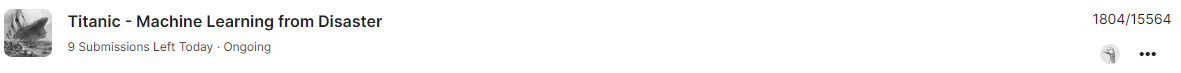

In [93]:
Image('result.png', width=1208)